In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

duckdb_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.duckdb"
sqlite_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.sqlite"
mza_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mza"
mzmlb_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mzMLb"
mzml_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mzML"
mzdb_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_poo_truepoopos_dda1.raw.mzDB"
mz5_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mz5"
spectrum_idx = 1000
precursor_mz = 118.0865
ppm_acc = 5
fragment_mz = 59.0737
neutral_loss = 59.0128

C:\Users\willi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyopenms\__init__.py:41: UserWarning: Warning: OPENMS_DATA_PATH environment variable already exists. pyOpenMS will use it (C:\Program Files\OpenMS-3.1.0\share\OpenMS) to locate data in the OpenMS share folder (e.g., the unimod database), instead of the default (C:\Users\willi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyopenms\share/OpenMS).
  warnings.warn(


MS/MS queries involved four relevant queries: 

a single scan extraction by scan number similar to that of the full scan; 

extraction of all the fragments associated with a precursor *m/z* within a given ppm; 

extraction of all fragments with *m/z* values within a given ppm; 

and finally a neutral loss query computed by subtracting the fragment mass from the precursor mass where the difference between the two fell within a specified ppm window around a given *m/z*.

## DuckDB

In [ ]:
# turn_mzml_duckdb("C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.mzML", "C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite")

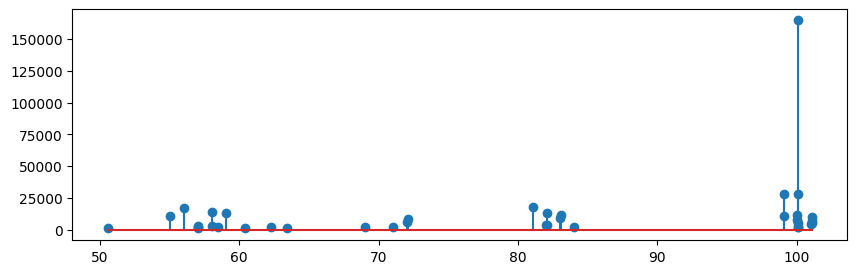

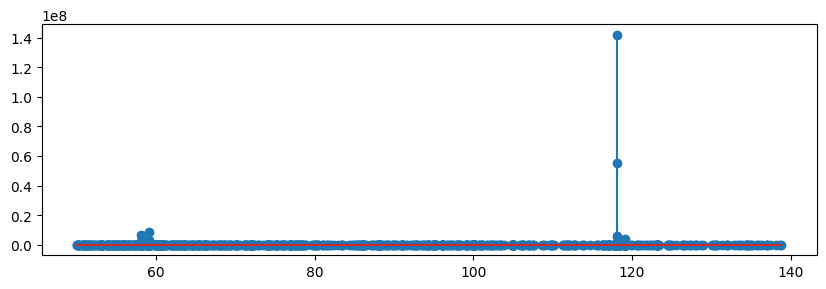

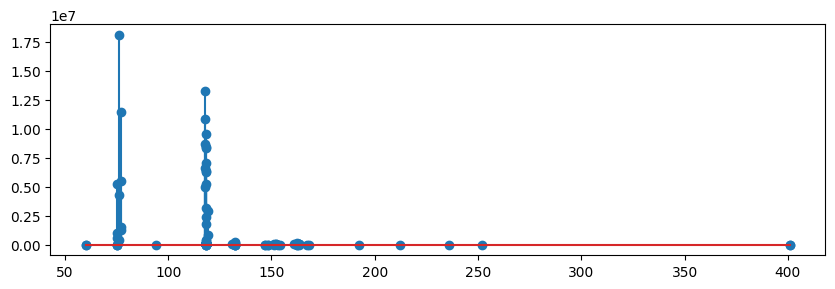

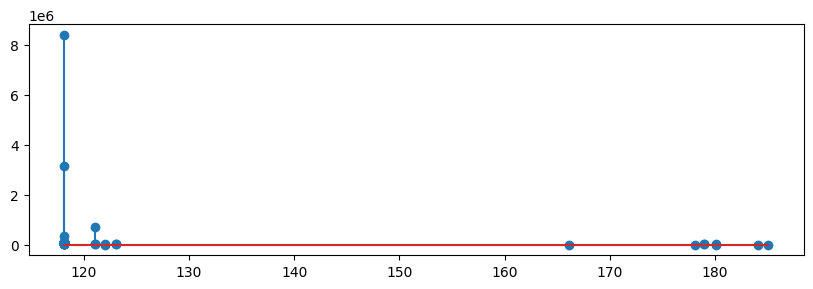

In [2]:
spectrum_data = get_MS2scan_duckdb(duckdb_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()
spectrum_data = get_MS2premz_duckdb(duckdb_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()
spectrum_data = get_MS2fragmz_duckdb(duckdb_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()
spectrum_data = get_MS2nloss_duckdb(duckdb_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## SQLite

In [2]:
# turn_mzml_sqlite("C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.mzML", "C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite")

'C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite'

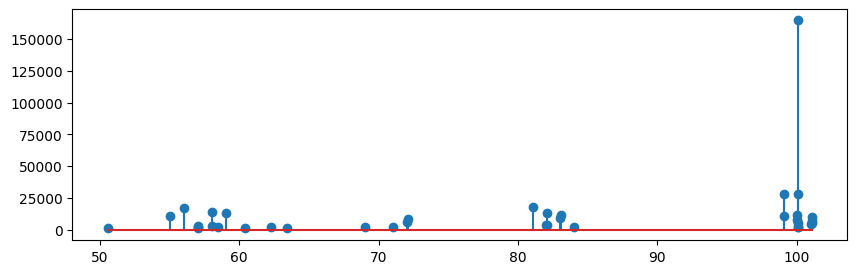

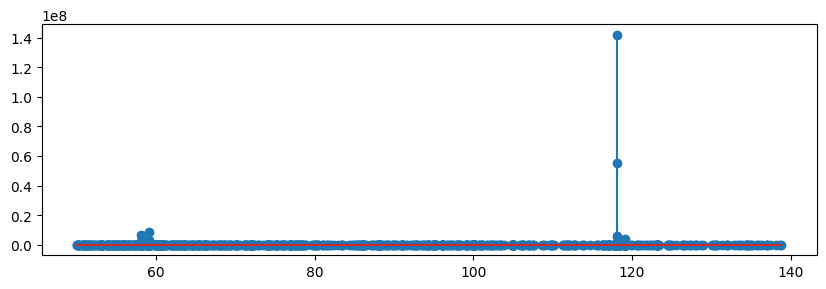

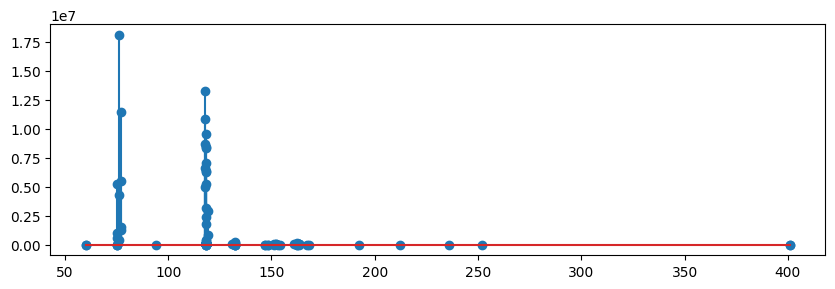

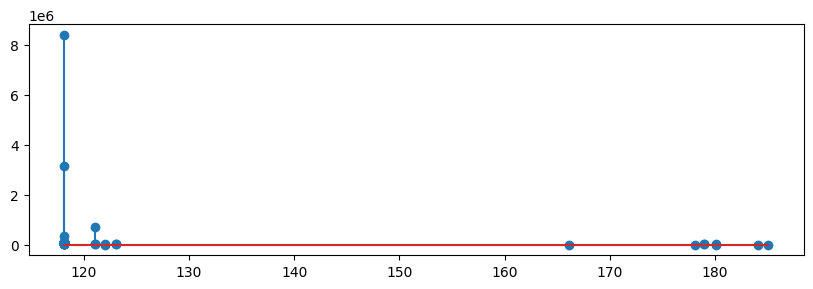

In [3]:
spectrum_data = get_MS2scan_sqlite(sqlite_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_sqlite(sqlite_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_sqlite(sqlite_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_sqlite(sqlite_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## MZA

In [ ]:
# mza.exe -file 180205_Poo_TruePooPos_dda1.raw

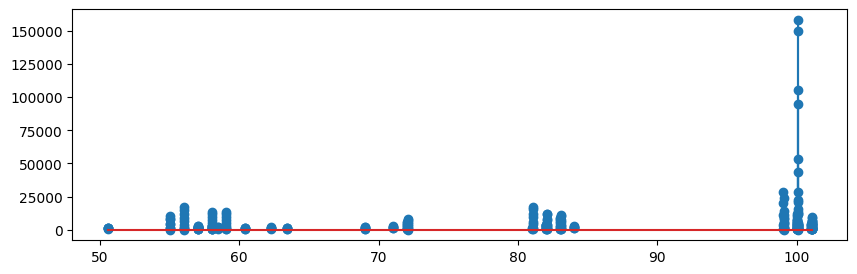

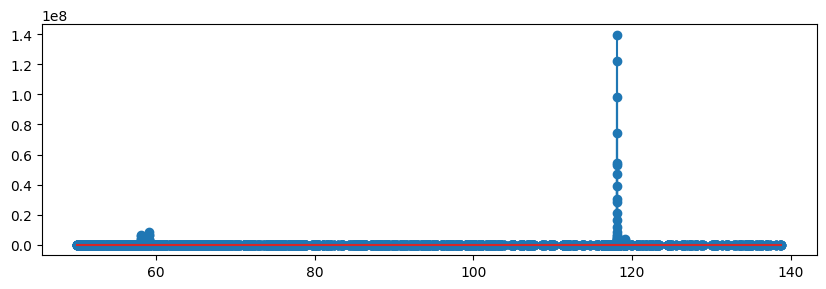

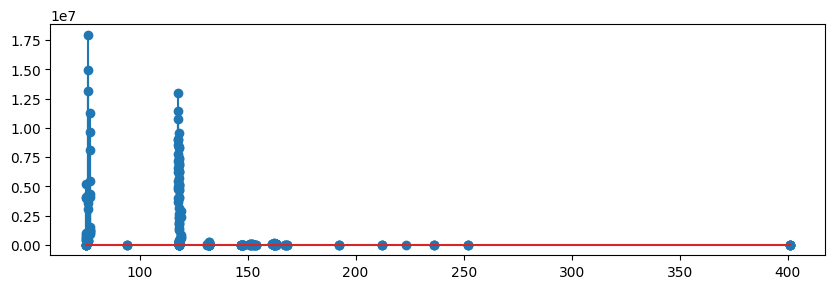

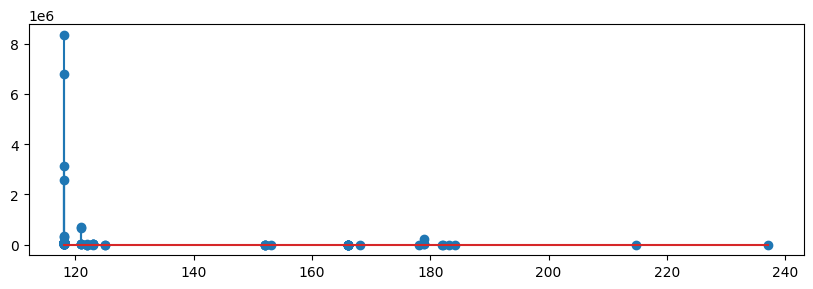

In [105]:
spectrum_data = get_MS2scan_mza(mza_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mza(mza_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mza(mza_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mza(mza_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## mzMLb

In [ ]:
# msconvert *.raw --mzMLb --filter "peakPicking true 1-"

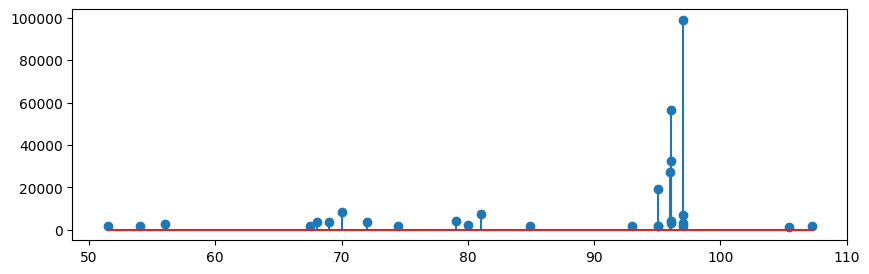

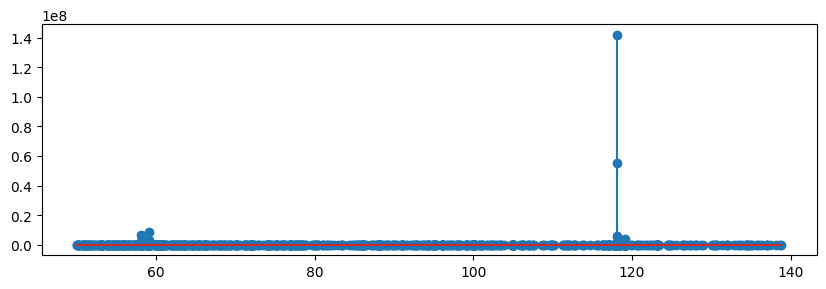

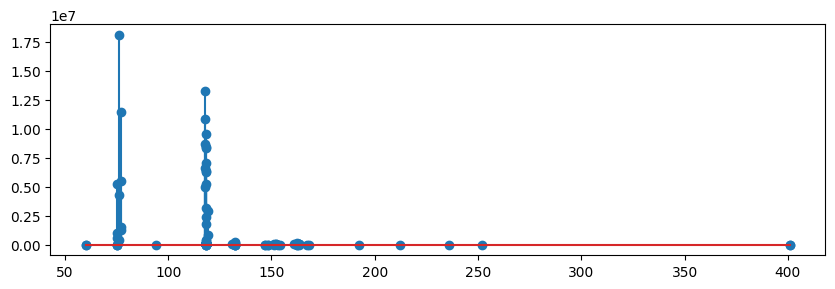

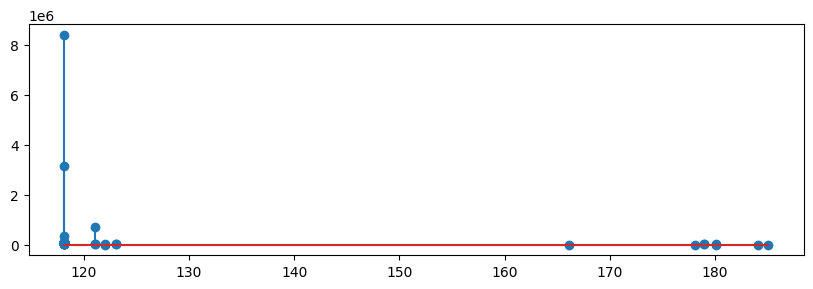

In [138]:
spectrum_data = get_MS2scan_mzmlb(mzmlb_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mzmlb(mzmlb_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mzmlb(mzmlb_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mzmlb(mzmlb_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## mzML (pyteomics)

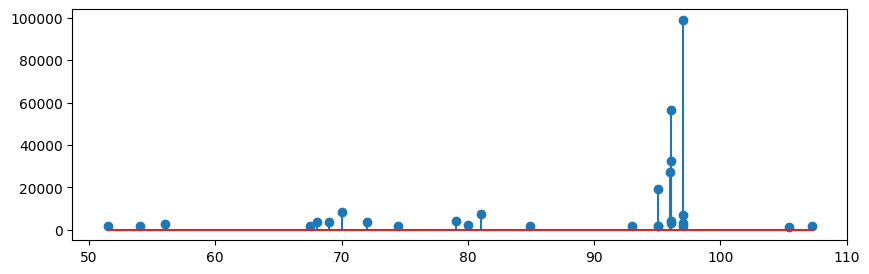

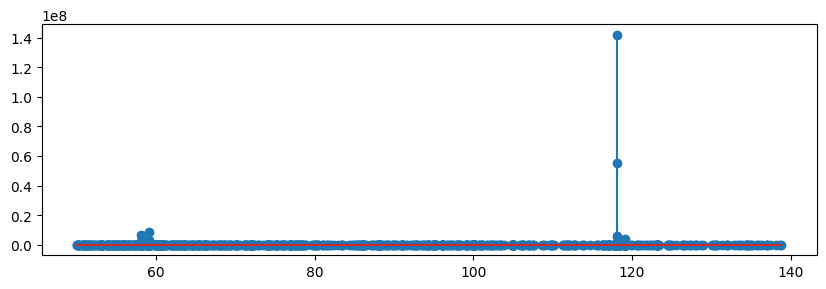

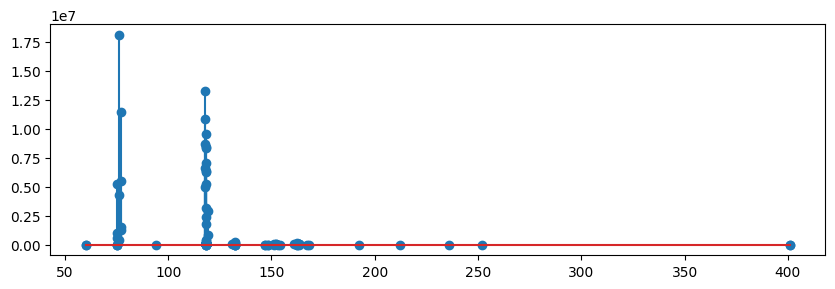

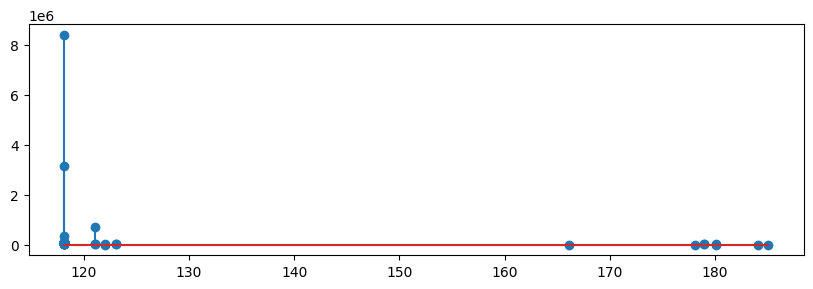

In [141]:
spectrum_data = get_MS2scan_mzml_pyteomics(mzml_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mzml_pyteomics(mzml_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mzml_pyteomics(mzml_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mzml_pyteomics(mzml_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## mzML (pyopenms)

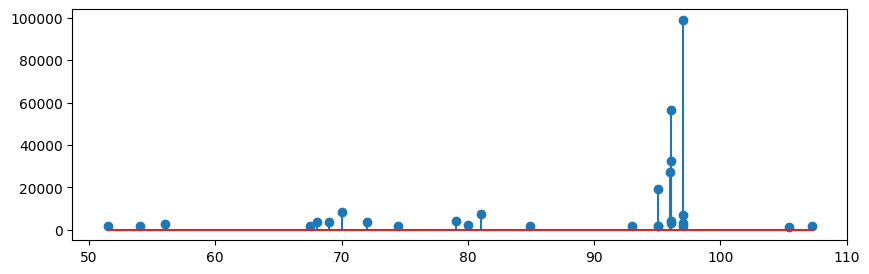

In [2]:
def get_MS2scan_mzml_pyopenms(mzml_file, spectrum_idx):
    exp = pyopenms.MSExperiment()
    pyopenms.MzMLFile().load(mzml_file, exp)
    premz_val = exp[spectrum_idx].getPrecursors()[0].getMZ()
    rt_val = exp[spectrum_idx].getRT()/60
    spec_data = exp[spectrum_idx].get_peaks()
    return(pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":spec_data[0], "int":spec_data[1]}))

spectrum_data = get_MS2scan_mzml_pyopenms(mzml_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

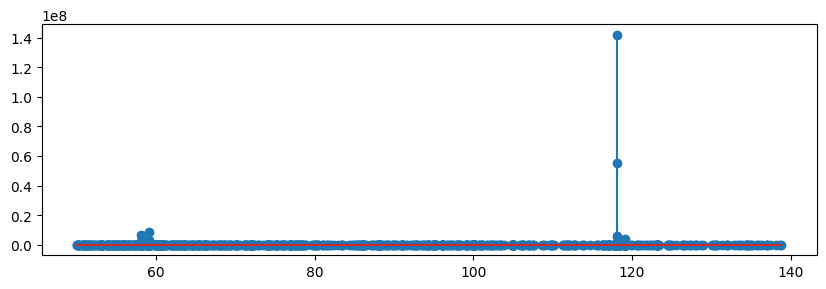

In [6]:
def get_MS2premz_mzml_pyopenms(mzml_file, precursor_mz, ppm_acc):
    exp = pyopenms.MSExperiment()
    pyopenms.MzMLFile().load(mzml_file, exp)
    mzmin, mzmax = pmppm(precursor_mz, ppm_acc)
    scan_dfs = []
    for spectrum in exp:
        if(spectrum.getMSLevel()==2):
            premz_val = spectrum.getPrecursors()[0].getMZ()
            if(mzmin < premz_val < mzmax):
                rt_val = spectrum.getRT()/60
                spec_data = spectrum.get_peaks()
                df_scan = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":spec_data[0], "int":spec_data[1]})
                scan_dfs.append(df_scan)
    return(pd.concat(scan_dfs, ignore_index=True))

spectrum_data = get_MS2premz_mzml_pyopenms(mzml_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

In [7]:
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(mzml_file, exp)
spectrum = exp[0]
spectrum.getMaxMZ()

-1.7976931348623157e+308

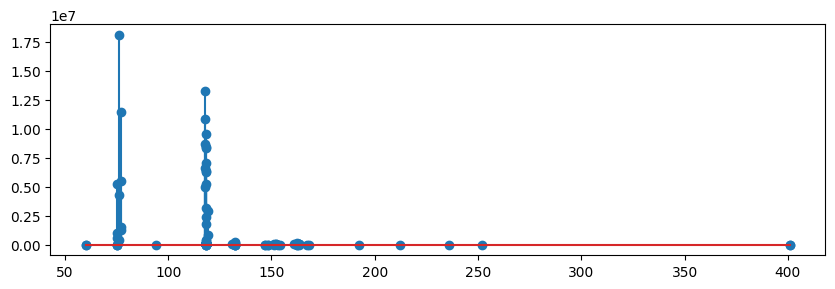

In [11]:
def get_MS2fragmz_mzml_pyopenms(mzml_file, fragment_mz, ppm_acc):
    exp = pyopenms.MSExperiment()
    pyopenms.MzMLFile().load(mzml_file, exp)
    mzmin, mzmax = pmppm(fragment_mz, ppm_acc)
    scan_dfs = []
    for spectrum in exp:
        if(spectrum.getMSLevel()==2):
            premz_val = spectrum.getPrecursors()[0].getMZ()
            rt_val = spectrum.getRT()
            mz_vals, int_vals = spectrum.get_peaks()
            bet_idxs = (mzmin < mz_vals) & (mz_vals < mzmax)
            if(sum(bet_idxs)>0):
                df_scan = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":mz_vals[bet_idxs], "int":int_vals[bet_idxs]})
                scan_dfs.append(df_scan)
    return(pd.concat(scan_dfs, ignore_index=True))

spectrum_data = get_MS2fragmz_mzml_pyopenms(mzml_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

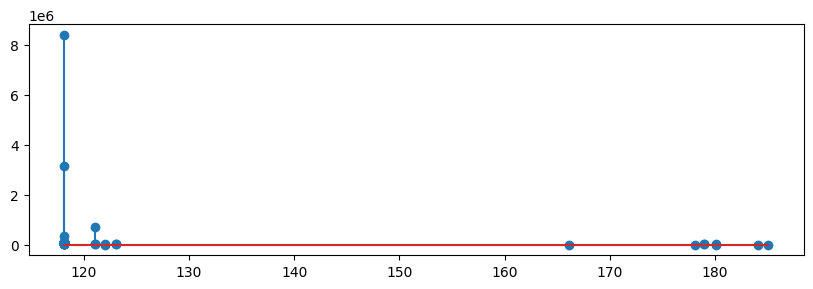

In [35]:
def get_MS2nloss_mzml_pyopenms(mzml_file, neutral_loss, ppm_acc):
    exp = pyopenms.MSExperiment()
    pyopenms.MzMLFile().load(mzml_file, exp)
    mzmin, mzmax = pmppm(neutral_loss, ppm_acc)
    scan_dfs = []
    for spectrum in exp:
        if(spectrum.getMSLevel()==2):
            premz_val = spectrum.getPrecursors()[0].getMZ()
            rt_val = spectrum.getRT()
            mz_vals, int_vals = spectrum.get_peaks()
            bet_idxs = (mzmin < premz_val-mz_vals) & (premz_val-mz_vals < mzmax)
            if(sum(bet_idxs)>0):
                df_scan = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":mz_vals[bet_idxs], "int":int_vals[bet_idxs]})
                scan_dfs.append(df_scan)
    return(pd.concat(scan_dfs, ignore_index=True))

spectrum_data = get_MS2nloss_mzml_pyopenms(mzml_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

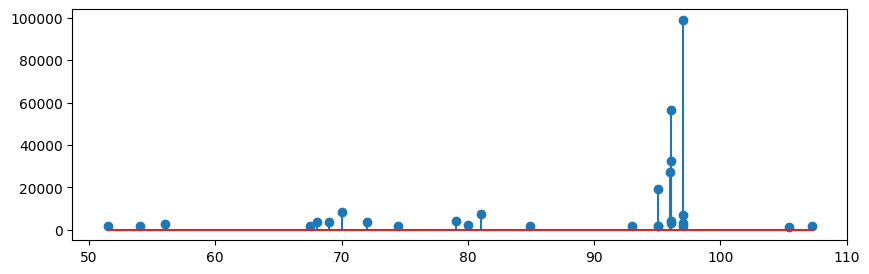

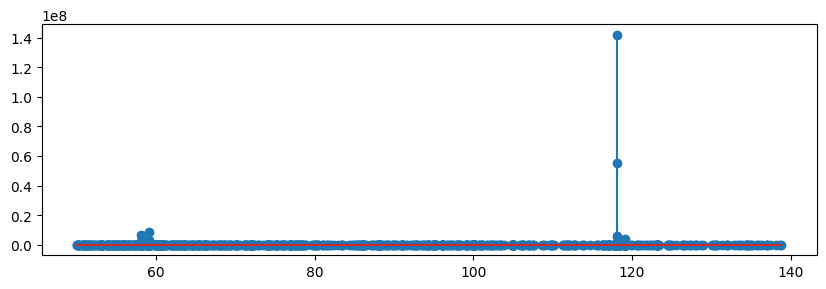

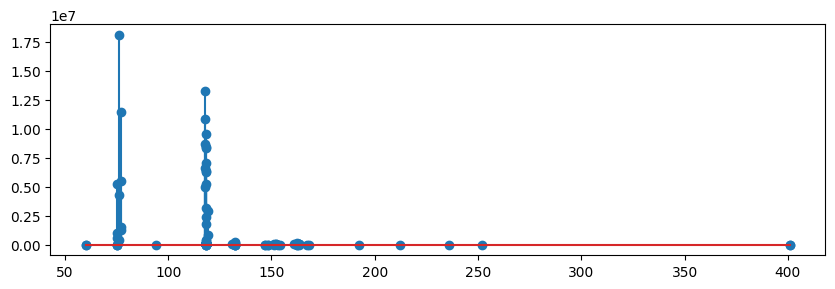

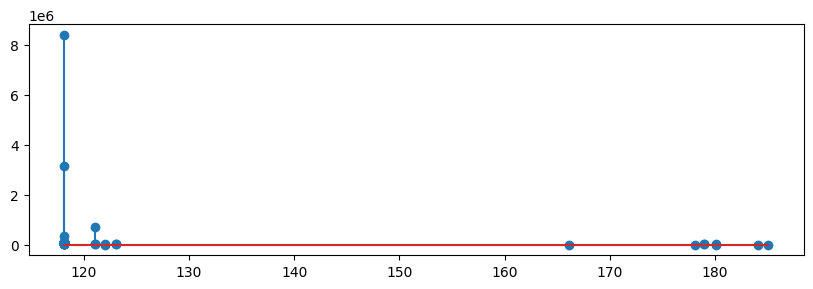

In [36]:
spectrum_data = get_MS2scan_mzml_pyopenms(mzml_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mzml_pyopenms(mzml_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mzml_pyopenms(mzml_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mzml_pyopenms(mzml_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## mzML (pymzml)

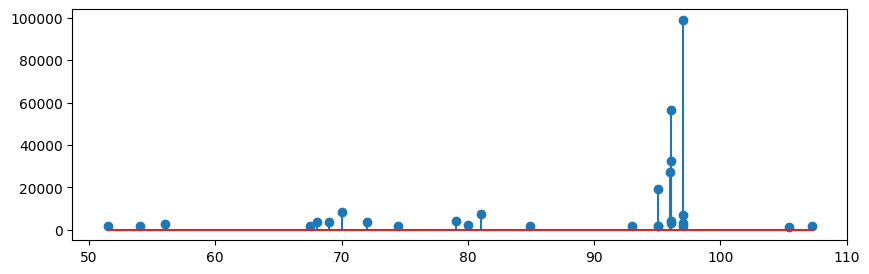

In [29]:
def get_MS2scan_mzml_pymzml(mzml_file, spectrum_idx):
    run = pymzml.run.Reader(mzml_file, build_index_from_scratch=True)
    spec1_data = run[spectrum_idx+1].peaks("raw")
    premz_val = run[spectrum_idx+1].selected_precursors[0]["mz"]
    rt_val = run[spectrum_idx+1].scan_time_in_minutes()
    scan_data = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":spec1_data[:,0], "int":spec1_data[:,1]})
    return(scan_data)

spectrum_data = get_MS2scan_mzml_pymzml(mzml_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

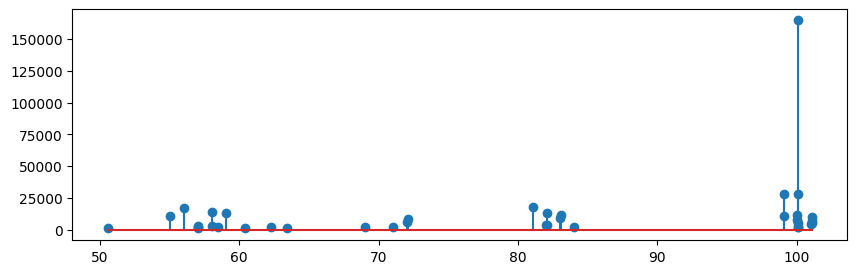

In [30]:
def get_MS2premz_mzml_pymzml(mzml_file, precursor_mz, ppm_acc):
    run = pymzml.run.Reader(mzml_file, build_index_from_scratch=True)
    mzmin, mzmax = pmppm(precursor_mz, ppm_acc)
    scan_dfs = []
    for spectrum in run:
        if(spectrum.ms_level==2):
            premz_val = spectrum.selected_precursors[0]["mz"]
            if(mzmin < premz_val < mzmax):
                rt_val = spectrum.scan_time_in_minutes()
                mz_vals = spectrum.mz
                int_vals = spectrum.i
                df_scan = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":spec1_data[:,0], "int":spec1_data[:,1]})
                scan_dfs.append(df_scan)
    return(pd.concat(scan_dfs, ignore_index=True))

spectrum_data = get_MS2premz_mzml_pymzml(mzml_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

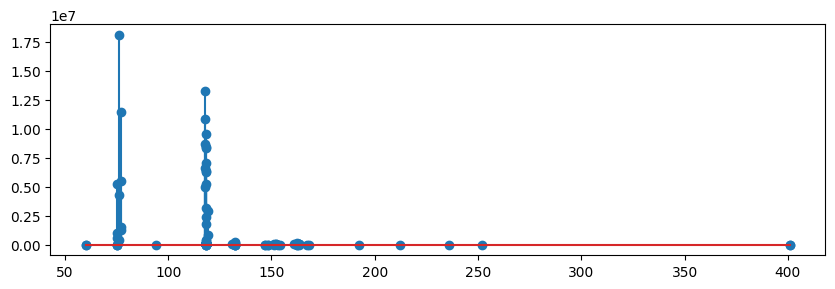

In [34]:
def get_MS2fragmz_mzml_pymzml(mzml_file, fragment_mz, ppm_acc):
    run = pymzml.run.Reader(mzml_file, build_index_from_scratch=True)
    mzmin, mzmax = pmppm(fragment_mz, ppm_acc)
    scan_dfs = []
    for spectrum in run:
        if(spectrum.ms_level==2):
            rt_val = spectrum.scan_time_in_minutes()
            premz_val = spectrum.selected_precursors[0]["mz"]
            mz_vals = spectrum.mz
            int_vals = spectrum.i
            bet_idxs = (mzmin < mz_vals) & (mz_vals < mzmax)
            if(sum(bet_idxs)>0):
                df_scan = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":mz_vals[bet_idxs], "int":int_vals[bet_idxs]})
                scan_dfs.append(df_scan)
    return(pd.concat(scan_dfs, ignore_index=True))

spectrum_data = get_MS2fragmz_mzml_pymzml(mzml_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

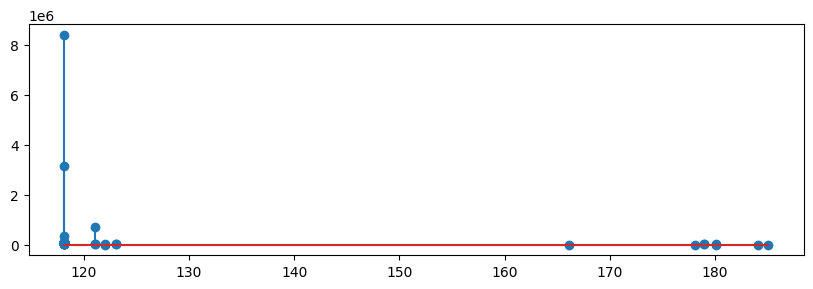

In [37]:
def get_MS2nloss_mzml_pymzml(mzml_file, neutral_loss, ppm_acc):
    run = pymzml.run.Reader(mzml_file, build_index_from_scratch=True)
    mzmin, mzmax = pmppm(neutral_loss, ppm_acc)
    scan_dfs = []
    for spectrum in run:
        if(spectrum.ms_level==2):
            rt_val = spectrum.scan_time_in_minutes()
            premz_val = spectrum.selected_precursors[0]["mz"]
            mz_vals = spectrum.mz
            int_vals = spectrum.i
            bet_idxs = (mzmin < premz_val-mz_vals) & (premz_val-mz_vals < mzmax)
            if(sum(bet_idxs)>0):
                df_scan = pd.DataFrame({"rt":rt_val, "premz":premz_val, "fragmz":mz_vals[bet_idxs], "int":int_vals[bet_idxs]})
                scan_dfs.append(df_scan)
    return(pd.concat(scan_dfs, ignore_index=True))

spectrum_data = get_MS2nloss_mzml_pymzml(mzml_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

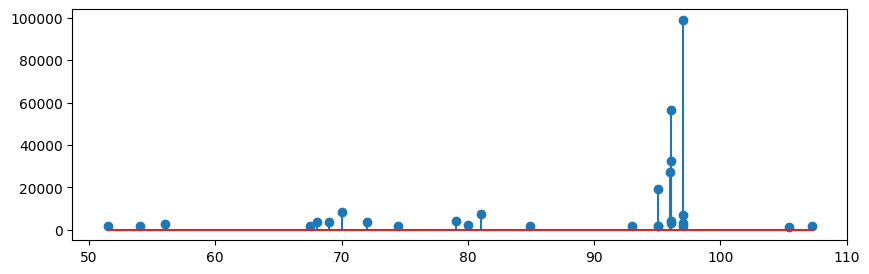

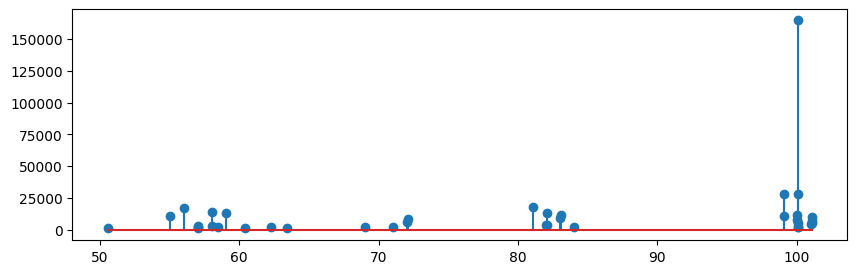

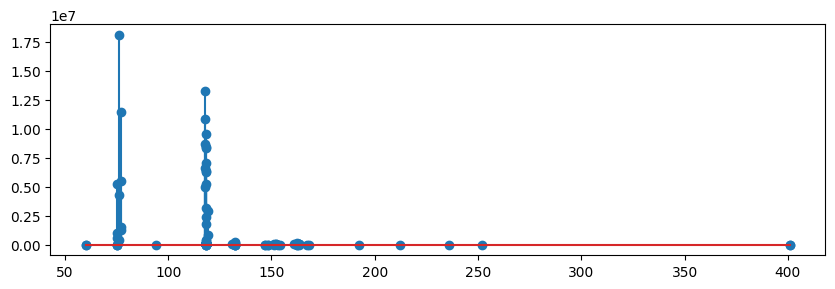

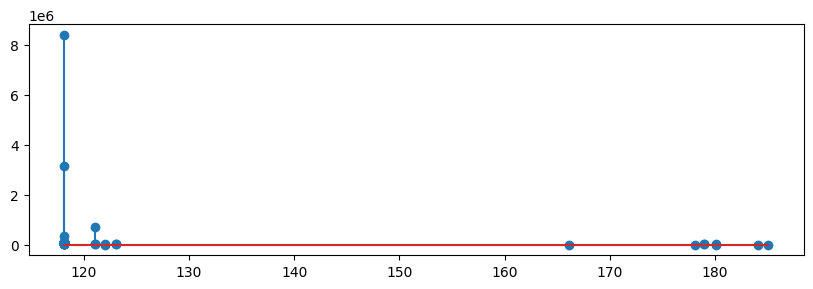

In [38]:
spectrum_data = get_MS2scan_mzml_pymzml(mzml_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mzml_pymzml(mzml_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mzml_pymzml(mzml_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mzml_pymzml(mzml_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## mzDB things

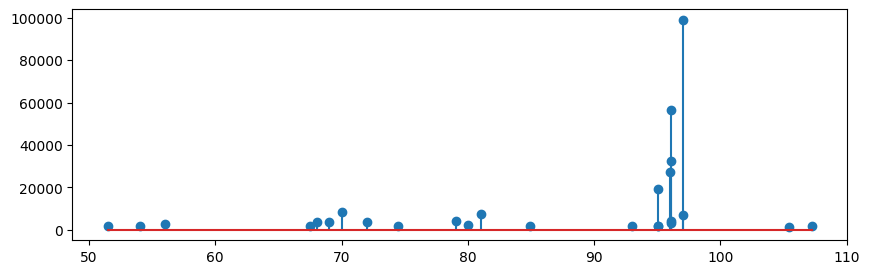

In [69]:
def get_MS2scan_mzdb(mzdb_file, spectrum_idx):
    connection = sqlite3.connect(mzdb_file)
    spec_bb_query = "SELECT bb_first_spectrum_id, precursor_list FROM spectrum WHERE id = ?"
    spectrum_metadata = pd.read_sql(spec_bb_query, connection, params=(spectrum_idx+1,))
    bb_id_for_scan = spectrum_metadata["bb_first_spectrum_id"][0]
    precursor_xml = spectrum_metadata["precursor_list"][0]

    premz_val = parse_mzDB_premz_string(precursor_xml)
    
    bb_query = """
    SELECT first_spectrum_id, data
    FROM bounding_box
    WHERE first_spectrum_id = ?
    """
    
    bb_dataframe = pd.read_sql(bb_query, connection, params=(str(bb_id_for_scan),))
    unpacked_bb_list = [unpack_raw_bb(bb_data) for bb_data in bb_dataframe["data"]]
    bb_spec = pd.concat(unpacked_bb_list)
    bb_spec.columns = ["fragmz", "int", "scan_id"]
    scan_data = bb_spec[bb_spec["scan_id"]==spectrum_idx+1]
    scan_data["premz"] = premz_val
    
    connection.close()
    return(scan_data)

spectrum_data = get_MS2scan_mzdb(mzdb_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

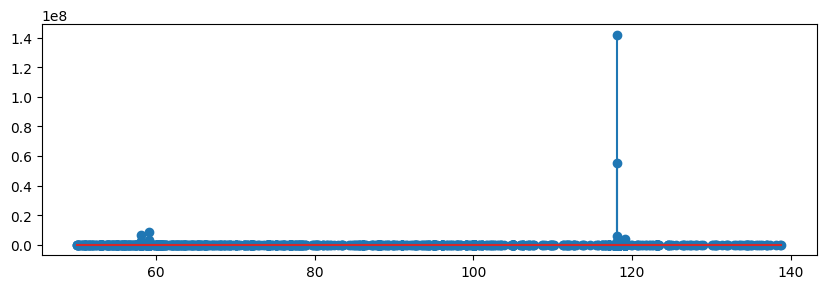

In [70]:
def get_MS2premz_mzdb(mzdb_file, precursor_mz, ppm_acc):
    connection = sqlite3.connect(mzdb_file)
    mzmin, mzmax = pmppm(precursor_mz, ppm_acc)
    spec_bb_query = "SELECT bb_first_spectrum_id, precursor_list FROM spectrum WHERE ms_level = 2"
    spectrum_metadata = pd.read_sql(spec_bb_query, connection)
    premz_vals = np.array([parse_mzDB_premz_string(x) for x in spectrum_metadata["precursor_list"]])
    chosen_scans = spectrum_metadata[(mzmin < premz_vals) & (premz_vals < mzmax)].astype("str")
    
    bb_query = """
    SELECT first_spectrum_id, data
    FROM bounding_box
    WHERE first_spectrum_id IN ({})
    """.format(','.join(chosen_scans["bb_first_spectrum_id"]))
    
    bb_dataframe = pd.read_sql(bb_query, connection)
    unpacked_bb_list = [unpack_raw_bb(bb_data) for bb_data in bb_dataframe["data"]]
    bb_spec = pd.concat(unpacked_bb_list)
    bb_spec.columns = ["fragmz", "int", "scan_id"]
    
    connection.close()
    return(bb_spec)

spectrum_data = get_MS2premz_mzdb(mzdb_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

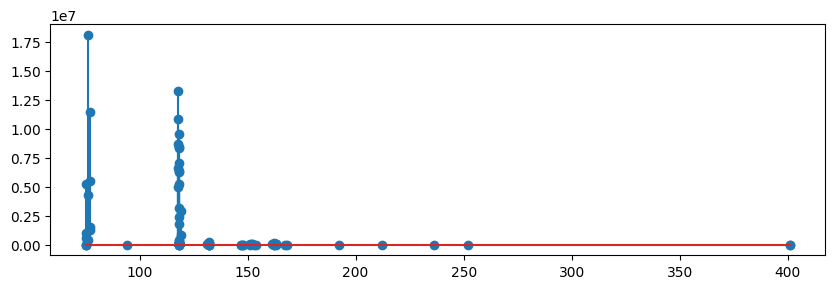

In [91]:
def get_MS2fragmz_mzdb(mzdb_file, fragment_mz, ppm_acc):
    connection = sqlite3.connect(mzdb_file)
    spec_bb_query = "SELECT bb_first_spectrum_id, precursor_list FROM spectrum WHERE ms_level = 2"
    spectrum_metadata = pd.read_sql(spec_bb_query, connection)
    ms2_query = '''
    SELECT data, precursor_list
    FROM bounding_box, spectrum
    WHERE ms_level = 2
    AND bounding_box.first_spectrum_id = spectrum.id
    '''
    ms2_bbs = pd.read_sql(ms2_query, connection)
    mzmin, mzmax = pmppm(fragment_mz, ppm_acc)
    scan_dfs = []
    premz_vals = np.array([parse_mzDB_premz_string(x) for x in ms2_bbs["precursor_list"]])
    for index, bb_data in enumerate(ms2_bbs["data"]):
        scan_data = unpack_raw_bb(bb_data)
        bet_idxs = (mzmin < scan_data["mz"]) & (scan_data["mz"] < mzmax)
        frag_data = scan_data[bet_idxs].copy()
        frag_data.columns = ["fragmz", "int", "scan_id"]
        frag_data["premz"] = premz_vals[index]
        scan_dfs.append(frag_data)
    spectrum_data = pd.concat(scan_dfs)
    return(spectrum_data)

spectrum_data = get_MS2fragmz_mzdb(mzdb_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

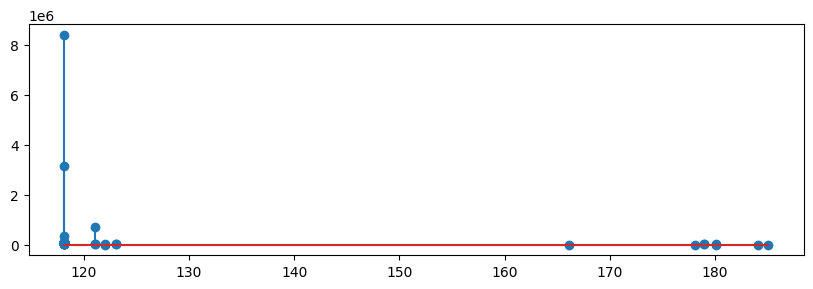

In [93]:
def get_MS2nloss_mzdb(mzdb_file, neutral_loss, ppm_acc):
    connection = sqlite3.connect(mzdb_file)
    spec_bb_query = "SELECT bb_first_spectrum_id, precursor_list FROM spectrum WHERE ms_level = 2"
    spectrum_metadata = pd.read_sql(spec_bb_query, connection)
    ms2_query = '''
    SELECT data, precursor_list
    FROM bounding_box, spectrum
    WHERE ms_level = 2
    AND bounding_box.first_spectrum_id = spectrum.id
    '''
    ms2_bbs = pd.read_sql(ms2_query, connection)
    mzmin, mzmax = pmppm(neutral_loss, ppm_acc)
    scan_dfs = []
    premz_vals = np.array([parse_mzDB_premz_string(x) for x in ms2_bbs["precursor_list"]])
    for index, bb_data in enumerate(ms2_bbs["data"]):
        scan_data = unpack_raw_bb(bb_data)
        bet_idxs = (mzmin < premz_vals[index]-scan_data["mz"]) & (premz_vals[index]-scan_data["mz"] < mzmax)
        frag_data = scan_data[bet_idxs].copy()
        frag_data.columns = ["fragmz", "int", "scan_id"]
        frag_data["premz"] = premz_vals[index]
        scan_dfs.append(frag_data)
    spectrum_data = pd.concat(scan_dfs)
    return(spectrum_data)

spectrum_data = get_MS2nloss_mzdb(mzdb_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

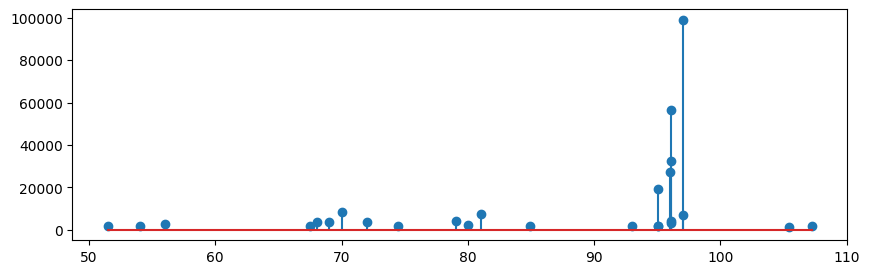

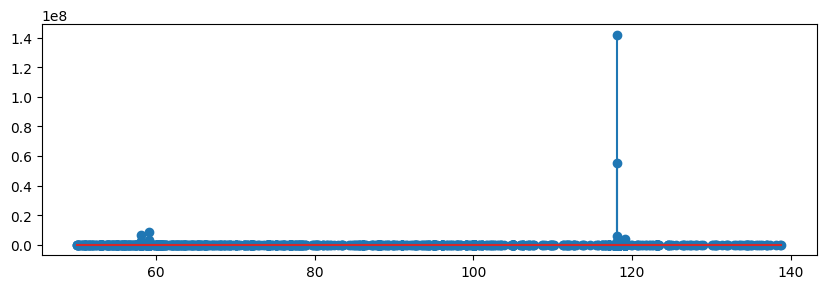

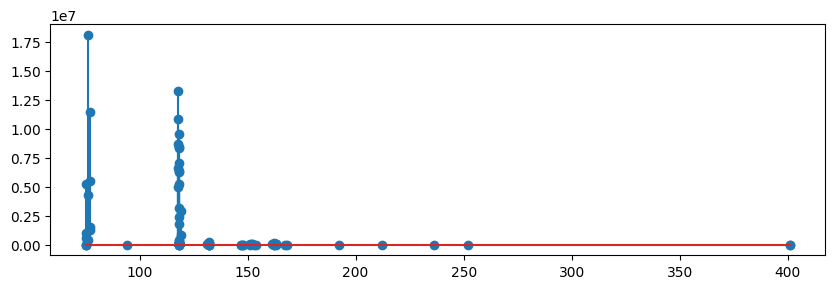

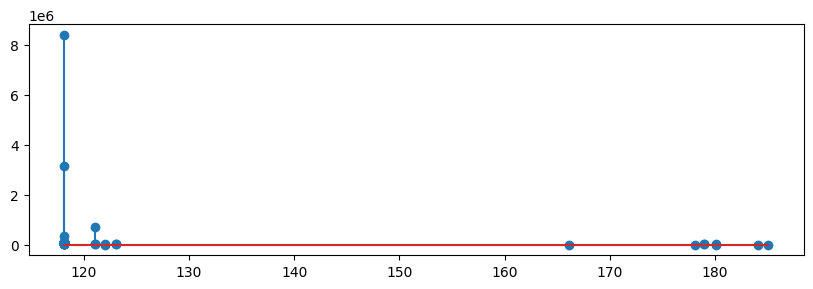

In [2]:
spectrum_data = get_MS2scan_mzdb(mzdb_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mzdb(mzdb_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mzdb(mzdb_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mzdb(mzdb_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

## mz5 things (nonfunctional)

In [4]:
mz5_obj.keys()

<KeysViewHDF5 ['CVParam', 'CVReference', 'ChomatogramTime', 'ChromatogramIndex', 'ChromatogramIntensity', 'ChromatogramList', 'ChromatogramListBinaryData', 'ControlledVocabulary', 'DataProcessing', 'FileContent', 'FileInformation', 'InstrumentConfiguration', 'ParamGroups', 'RefParam', 'Run', 'Software', 'SourceFiles', 'SpectrumIndex', 'SpectrumIntensity', 'SpectrumListBinaryData', 'SpectrumMZ', 'SpectrumMetaData', 'UserParam']>

In [15]:
mz5_obj = h5py.File(mz5_file, 'r')
mz5_obj["SpectrumMetaData"].dtype

dtype({'names': ['id', 'spotID', 'params', 'scanList', 'precursors', 'products', 'refDataProcessing', 'refSourceFile', 'index'], 'formats': ['O', 'O', [('cvstart', '<u4'), ('cvend', '<u4'), ('usrstart', '<u4'), ('usrend', '<u4'), ('refstart', '<u4'), ('refend', '<u4')], {'names': ['params', 'scanList'], 'formats': [[('cvstart', '<u4'), ('cvend', '<u4'), ('usrstart', '<u4'), ('usrend', '<u4'), ('refstart', '<u4'), ('refend', '<u4')], 'O'], 'offsets': [0, 24], 'itemsize': 40}, 'O', 'O', [('refID', '<u4')], [('refID', '<u4')], '<u4'], 'offsets': [0, 8, 16, 40, 80, 96, 112, 116, 120], 'itemsize': 128})

In [63]:
len(mz5_obj["SpectrumMetaData"]["precursors"][15])

1

In [36]:
print(mz5_obj["SpectrumMetaData"]["precursors"][0:20][15]["isolationWindow"])
print(mz5_obj["SpectrumMetaData"]["precursors"][0:20][16]["isolationWindow"])

[(323, 326, 2, 3, 0, 0)]
[(350, 353, 4, 5, 0, 0)]


In [67]:
mz5_obj["SpectrumMetaData"]["precursors"][15]["activation"]

array([(321, 323, 0, 0, 0, 0)],
      dtype=[('cvstart', '<u4'), ('cvend', '<u4'), ('usrstart', '<u4'), ('usrend', '<u4'), ('refstart', '<u4'), ('refend', '<u4')])

In [3]:
mz5_obj = h5py.File(mz5_file, 'r')
scan_idxs = np.concatenate(([0], mz5_obj["SpectrumIndex"][...]))
lower_bound = scan_idxs[spectrum_idx]
upper_bound = scan_idxs[spectrum_idx+1]
mz_vals = np.cumsum(mz5_obj["SpectrumMZ"][lower_bound:upper_bound])
int_vals = mz5_obj["SpectrumIntensity"][lower_bound:upper_bound]
pd.DataFrame({"mz":mz_vals, "int":int_vals})

,mz,int
0,51.472855,1557.616699
1,54.034752,1865.081665
2,56.050167,2674.203125
3,67.544113,1609.068848
4,68.050255,3783.328857
5,69.045395,3699.323486
6,70.065804,8406.647461
7,72.028557,3676.709229
8,74.494820,1589.268188
9,79.054756,4205.133789


In [ ]:
def get_MS2scan_mz5(mz5_file, spectrum_idx):
    

spectrum_data = get_MS2scan_mz5(mz5_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

In [ ]:
spectrum_data = get_MS2scan_mz5(mz5_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_mz5(mz5_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_mz5(mz5_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_mz5(mz5_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()